In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Sydney_Data.csv')

In [3]:
df.isna().sum()

127.9439    0
264.9656    0
68.3481     0
521.757     0
443.6997    0
195.9648    0
166.7701    0
504.285     0
104.0226    0
205.2257    0
348.0209    0
dtype: int64

In [4]:
df.head()

,127.9439,264.9656,68.3481,521.757,443.6997,195.9648,166.7701,504.285,104.0226,205.2257,348.0209
0,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,520.4714
1,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,566.0000
2,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,511.7909
3,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,509.8984
4,446.6611,421.0366,493.1895,566.0000,516.3773,566.0000,566.0000,474.8170,566.0000,0.0000,299.7096


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   127.9439  345 non-null    float64
 1   264.9656  345 non-null    float64
 2   68.3481   345 non-null    float64
 3   521.757   345 non-null    float64
 4   443.6997  345 non-null    float64
 5   195.9648  345 non-null    float64
 6   166.7701  345 non-null    float64
 7   504.285   345 non-null    float64
 8   104.0226  345 non-null    float64
 9   205.2257  345 non-null    float64
 10  348.0209  345 non-null    float64
dtypes: float64(11)
memory usage: 29.8 KB


# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [7]:
data1 = ss.fit_transform(df)

In [8]:
data = pd.DataFrame(data1)

In [9]:
X = data.iloc[:,0:-1].values
Y = data[9].values

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.366122,-0.023011,-0.537659,1.909818,0.718291,-0.300718,-0.843826,-0.052488,1.478156,-1.827163,0.537248
1,0.450715,-1.315740,2.393560,1.666817,-0.774940,-2.850852,-0.283115,-1.180950,2.837927,1.943055,0.813717
2,-3.238289,-0.484652,1.202609,-0.388535,0.479035,-2.392178,0.535638,0.401467,2.837927,0.104746,0.484536
3,-3.385976,-2.090720,0.569818,-0.834431,0.821963,-2.850852,0.385147,-1.234199,2.837927,1.943055,0.473044
4,-0.037276,1.033565,1.982017,2.887117,0.462000,0.746977,2.660664,2.234127,2.837927,-2.160564,-0.803312


# Spliting the data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [12]:
from  sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [14]:
y_pred = lr.predict(xtest)

# Evaluating the result using mean squared error

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,y_pred)

In [16]:
print(mse)

1.5737839839386942e-30


# Using Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7)
dt.fit(xtrain,ytrain)
y_pred = dt.predict(xtest)

In [18]:
mse = mean_squared_error(ytest,y_pred)

In [19]:
print(mse)

0.00047762961765065754


# Decision Tree

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
df=pd.read_csv("Sydney_Data.csv",header=None,na_values="?")
#print(df.head)
#print(df.isna().sum())
df_i=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))
#print(df_i.isna().sum())
for i in range(0,10):
    df_i[i]=LabelEncoder().fit_transform(df_i[i])
#print(df_i.head())
xtrain,xtest,ytrain,ytest=train_test_split(df_i.drop(columns=[0]),df_i[0],test_size=0.3)
print(xtrain.shape,xtest.shape)

(242, 10) (104, 10)


C:\Users\aragh\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [22]:
model_df = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model_df.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
train_pred=model_df.predict(xtrain)
test_pred=model_df.predict(xtest)
print("training accuracy is",accuracy_score(train_pred,ytrain))
print("testing accuracy is",accuracy_score(test_pred,ytest))

training accuracy is 0.19834710743801653
testing accuracy is 0.07692307692307693


[Text(0.5, 0.9, 'X[2] <= 98.5\nentropy = 7.034\nsamples = 242\nvalue = [4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 39]'),
 Text(0.25, 0.7, 'X[6] <= 152.5\nentropy = 6.37\nsamples = 98\nvalue = [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0\n0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0\n1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0\n1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 

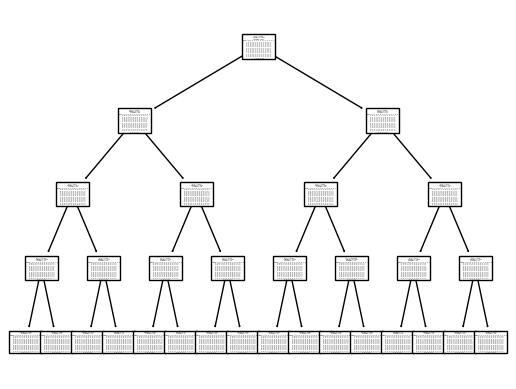

In [24]:
from sklearn.tree import plot_tree
plot_tree(model_df)

# Plotting

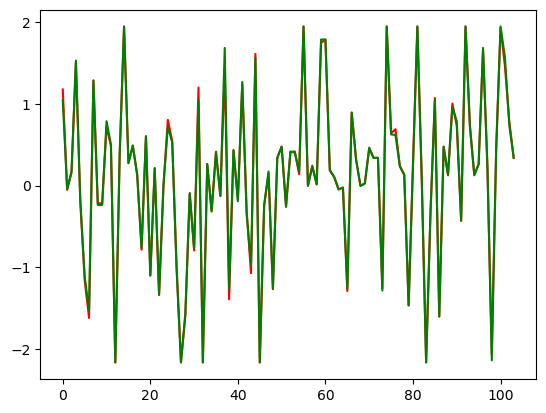

In [25]:
import matplotlib.pyplot as plt
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
pred=dtr.predict(xtest)
plt.plot(ytest,color='red')
plt.plot(pred,color='green')
plt.show()

In [26]:
from sklearn.metrics import r2_score
print(r2_score(ytest,pred))

0.9981110521672283


# Hypherparameter Tunning

In [27]:
dt2 = DecisionTreeRegressor(max_depth=5)
dt2.fit(xtrain,ytrain)
y_pred = dt2.predict(xtest)
mse = mean_squared_error(ytest,y_pred)
print(mse)

0.002720920186492576


# Perceptron

In [28]:
for i in range(0, 10):
    print(df[i].unique())
print(df.isna().sum())
from sklearn.impute import SimpleImputer
df_i=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))
print(df_i.isna().sum())
from sklearn.preprocessing import LabelEncoder
for i in range(0, 10):
    df_i[i]=LabelEncoder().fit_transform(df_i[i])
print(df_i.head())
target=df_i[0]
data=df_i.drop(columns=[0])
print(target.shape,data.shape)

[127.9439 500.4677 511.751   19.699    0.     446.6611 398.0662 113.7286
 369.2071  39.8478 439.0358  50.0986 272.5004 413.7988 566.      97.9184
 221.7172 452.9587 467.557  515.9328 343.626  424.0471 525.4519 565.8086
 559.4708 501.029  372.2292 367.4726 389.2085 516.0481 493.4766 463.0389
 477.2954 519.9934 487.8905 543.4096 446.1064 526.212  480.8352 502.1867
 556.5428 549.4976 540.6315 554.6778 446.5006 536.6982 502.2743 532.1114
 460.0135 475.4811 477.9266 540.5214 514.7456 514.5096 516.3021 517.901
 548.2871 541.0588 526.1485 508.3824 547.5275 551.0588 497.4477 504.4722
  70.5083 206.615  426.3667 247.3525 500.3557 403.3909 528.8    279.1182
 429.3503 383.2791 494.6784 441.6646 517.5289 498.8551 329.7617 534.8529
 398.8072 364.1853 337.1513 473.2383 467.4357 423.6309 526.7614 414.8111
 392.5737 330.8578 533.1588 529.1093 487.8653 451.2545 444.9908 411.4369
 396.5651 463.4041 538.1551 531.0947 525.2911 519.3466 441.9577 515.3448
 489.5409 553.7676 505.2602 457.2873 511.4156 486.88

C:\Users\aragh\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,ytrain,ytest=train_test_split(data,target,test_size=0.7)
print(x_train.shape,x_test.shape,ytrain.shape,ytest.shape)

(103, 10) (243, 10) (103,) (243,)


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,ytrain,ytest=train_test_split(data,target,test_size=0.3)
print(x_train.shape,x_test.shape,ytrain.shape,ytest.shape)

(242, 10) (104, 10) (242,) (104,)


In [31]:
from sklearn.linear_model import Perceptron
model=Perceptron()

In [32]:
model.fit(x_train,ytrain)

Perceptron()

In [33]:
from sklearn.metrics import accuracy_score
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)
print("Accuracy for training", accuracy_score(pred_train,ytrain))
print("Accuracy for testing", accuracy_score(pred_test, ytest))

Accuracy for training 0.26859504132231404
Accuracy for testing 0.038461538461538464
